In [130]:
# Authors: Jeroen BUil
# License: BSD-3-Clause

# Init

In [131]:
import glob as glob 
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd

from IPython.display import clear_output

from deegtal_coding_task.config import *
from deegtal_coding_task.dimensionality_reduction import get_tsne_df, plot_dim_reduction, get_pca_df

from mne.viz import set_browser_backend
set_browser_backend("matplotlib")


'matplotlib'

In [132]:
save_figs = False

# Load data

In [133]:
folder_raw_group_1 = RAW_DATA_DIR / 'Group1'
folder_raw_group_2 = RAW_DATA_DIR / 'Group2'

files_raw_group_1 = list(folder_raw_group_1.glob('*.edf'))
files_raw_group_2 = list(folder_raw_group_2.glob('*.edf'))

files_raw = [files_raw_group_1, files_raw_group_2]
print(files_raw[0], '\n', files_raw[1])


[WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group1/1_5.edf')] 
 [WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_1.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_2.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_3.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_4.edf'), WindowsPath('C:/Users/buil003/Documents/Code/deegtal_coding_task/data/raw/Group2/2_5.edf')]


<RawEDF | 1_4.edf, 30 x 318750 (1275.0 s), ~73.0 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 30 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2012-01-01 00:00:00 UTC
 nchan: 30
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


C:\Users\buil003\AppData\Local\Temp\ipykernel_21100\425335828.py:7: RuntimeWarning:

Channel locations not available. Disabling spatial colors.

c:\Users\buil003\Documents\Code\deegtal_coding_task\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



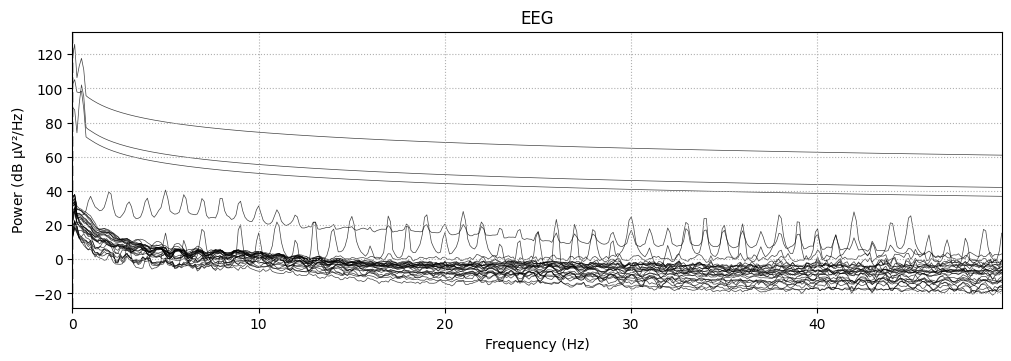

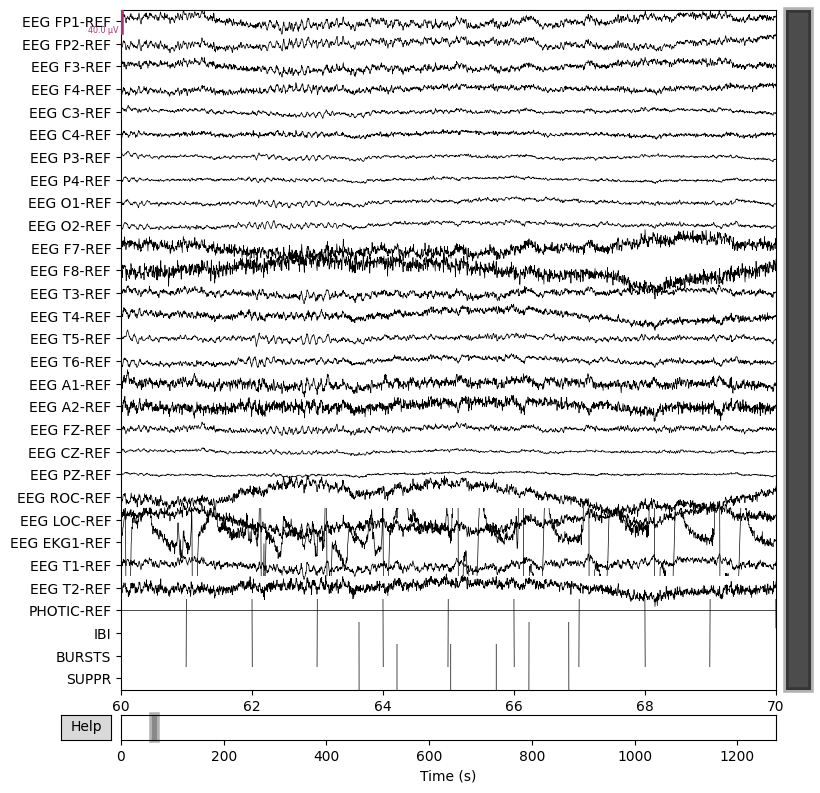

c:\Users\buil003\Documents\Code\deegtal_coding_task\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



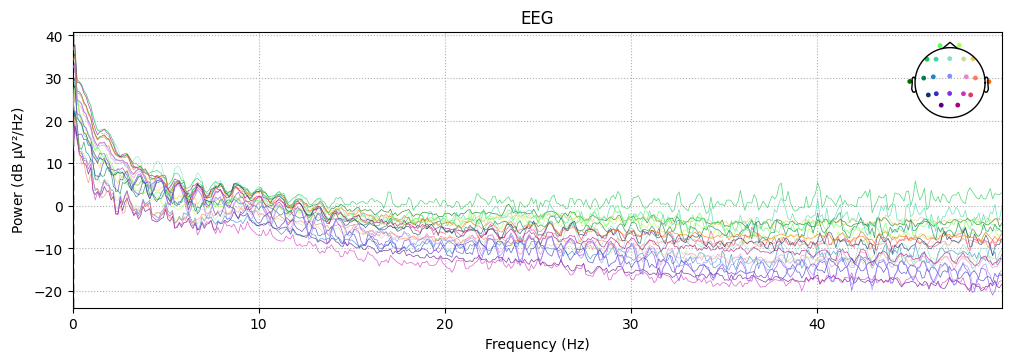

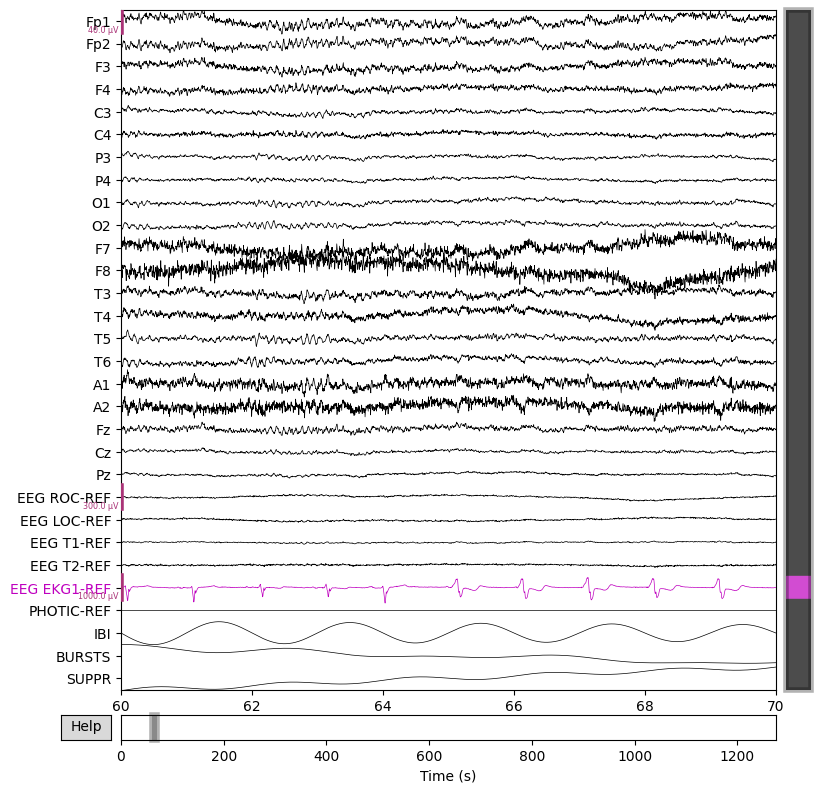

C:\Users\buil003\AppData\Local\Temp\ipykernel_21100\425335828.py:17: UserWarning:

Zero value in spectrum for channel Cz

c:\Users\buil003\Documents\Code\deegtal_coding_task\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



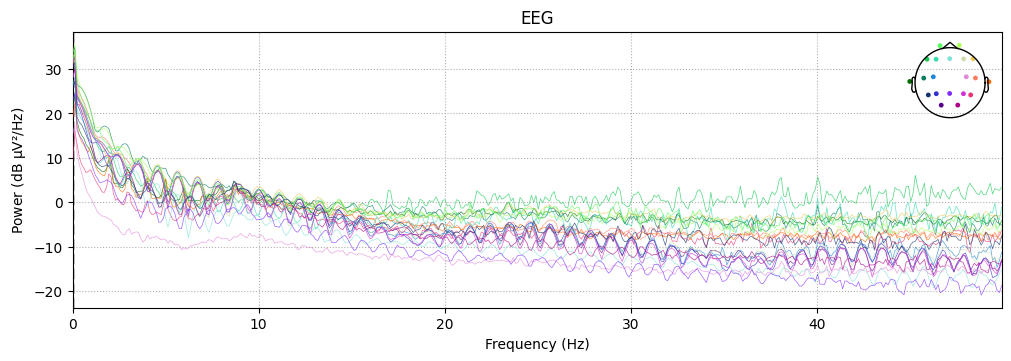

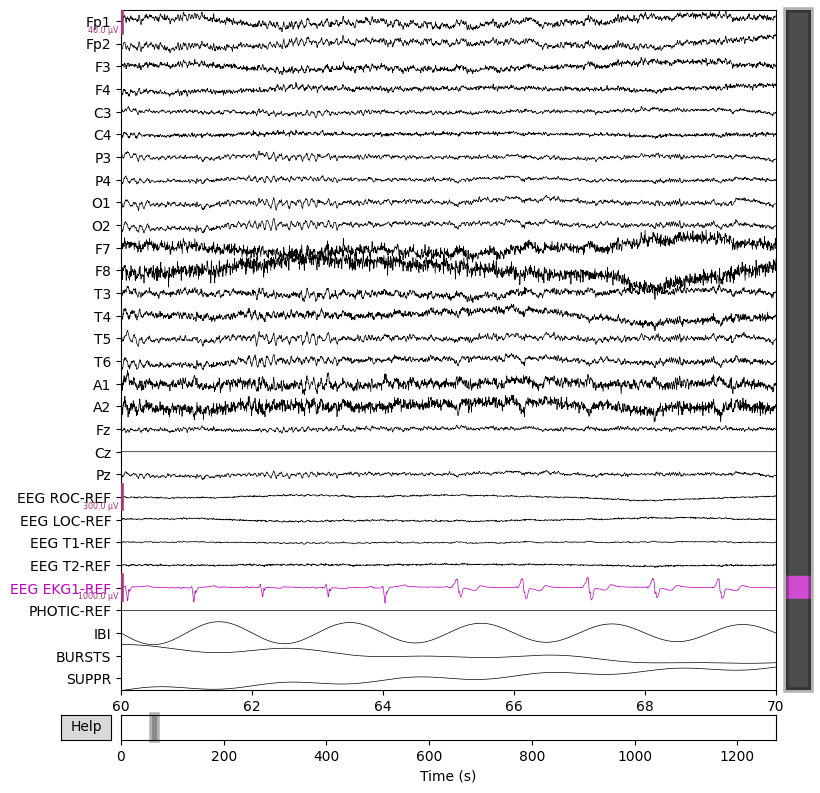

In [154]:
# Preview unprocessed data
raw = mne.io.read_raw_edf(files_raw[0][3],  preload=True)
print(raw)
print(raw.info)

with mne.viz.use_browser_backend('matplotlib'):
    raw.compute_psd(fmax=50).plot(picks='data', exclude="bads", amplitude=False)
    raw.plot(n_channels=36, start=60)

raw = fix_channel_names(raw=raw)
with mne.viz.use_browser_backend('matplotlib'):
    raw.compute_psd(fmax=50).plot(picks='eeg', exclude="bads", amplitude=False)
    raw.plot(n_channels=36, start=60)
    
rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ["Cz"], copy=True)
with mne.viz.use_browser_backend('matplotlib'):
    rereferenced_raw.compute_psd(fmax=50).plot(picks='eeg', exclude=["Cz"], amplitude=False)
    rereferenced_raw.plot(n_channels=36, start=60)

## Fix channel names + assign types

In [7]:
mne.channels.get_builtin_montages(descriptions=True)
# It's likely based on the standard_1020, but some channel names are named different

[('standard_1005',
  'Electrodes are named and positioned according to the international 10-05 system (343+3 locations)'),
 ('standard_1020',
  'Electrodes are named and positioned according to the international 10-20 system (94+3 locations)'),
 ('standard_alphabetic',
  'Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)'),
 ('standard_postfixed',
  'Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)'),
 ('standard_prefixed',
  'Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)'),
 ('standard_primed',
  "Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)"),
 ('biosemi16', 'BioSemi cap with 16 electrodes (16+3 locations)'),
 ('biosemi32', 'BioSemi cap with 32 electrodes (32+3 locations)'),
 ('biosemi64', 'BioSemi cap w

In [8]:
raw.info['ch_names']

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [9]:
def fix_channel_names(raw:mne.io.edf.edf.RawEDF)->mne.io.edf.edf.RawEDF:
    """ This function converts the channel names to standard_1020 so that MNE:
    - can read it in properly and assign sensor locations
    - can assign EPOCHs to the stim channel
    
    ARG:
    - raw = MNE raw file as they are provided by dEEGtal for their coding task
    
    RETURN:   
    - MNE raw file with standard_1020 ch_names 
    """
    
    correct_ch_names = {}
    
    if len(raw.info['ch_names']) == 36:
        raw.set_channel_types({ 'EMG-REF':      'emg',
                                'PHOTIC-REF':   'stim',
                                'IBI':          'stim',
                                'BURSTS':       'stim',
                                'SUPPR':        'stim',
                                'EEG T1-REF':   'eog',
                                'EEG T2-REF':   'eog',
                                'EEG ROC-REF':  'eog',
                                'EEG LOC-REF':  'eog',
                                'EEG 26-REF':   'misc',
                                'EEG 27-REF':   'misc',
                                'EEG 28-REF':   'misc',
                                'EEG 29-REF':   'misc',
                                'EEG 30-REF':   'misc',
                                'EEG EKG1-REF': 'ecg'})
        
    elif len(raw.info['ch_names']) == 30:
        raw.set_channel_types({' PHOTIC-REF':   'stim',
                                'IBI':          'stim',
                                'BURSTS':       'stim',
                                'SUPPR':        'stim',
                                'EEG T1-REF':   'eog',
                                'EEG T2-REF':   'eog',
                                'EEG ROC-REF':  'eog',
                                'EEG LOC-REF':  'eog',
                                'EEG EKG1-REF': 'ecg'})
    else: 
        raise ValueError('raw contains neither 30 nor 36 channels, this function cannot handle those cases')
    
    for i,ch_name in enumerate(raw.info.ch_names):
        if mne.channel_type(raw.info, i) != 'eeg':
            continue
            
        if ch_name[4:-4] in ['FP1', 'FP2', 'FZ', 'CZ', 'PZ']:
            corr = ch_name[4:-4]
            if len(corr) == 3:
                correct_ch_names[ch_name] = corr[0] + corr[1].lower() + corr[2]
            elif len(corr) == 2:
                correct_ch_names[ch_name] = corr[0] + corr[1].lower()

        else:
            correct_ch_names[ch_name] = ch_name[4:-4]
        
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.rename_channels(correct_ch_names)
    raw.set_montage(montage)
    
    return raw  

In [10]:
raw = fix_channel_names(raw=raw)

raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 21 EEG, 4 EOG, 1 ECG, 4 Stimulus
 custom_ref_applied: False
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2012-01-01 00:00:00 UTC
 nchan: 30
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>

## Set bads (not used)

In [11]:
def set_bads(raw:mne.io.edf.edf.RawEDF, bad_ch:list)->mne.io.edf.edf.RawEDF:
    """ This function sets the bad channels for the channels provided by dEEGtal for their coding task
    
    ARG:
    - raw = MNE raw file
    
    RETURN:   
    - MNE raw file with bad channels assigned to them
    """
    
    correct_ch_names = {}

    
    # Add bads
    raw.info['bads'] = bad_ch
    
    return raw

## Get Epochs

In [12]:
from scipy.signal import find_peaks

def get_epochs_from_photic_stimuli_train_events(raw:mne.io.edf.edf.RawEDF, stim_ch:str, pulse_train_duration_s:float|int=10, tmin:float=-0.2, tmax:float=10.5)->mne.epochs.Epochs:
    """ This function detects spike train events using scipy find_peaks and turns them into epochs
    
    ARG:
    - raw: MNE raw file
    - stim_ch: name of stimulus channel
    - pulse_train_duration_s: length of the pulse/spike train (this prevents each spike to be registered as event)
    - tmin:  Start of epoch time window before the event
    - tmax:  End of epoch time window after the event
    
    RETURN:   
    - mne Epoch
    """
    # Get Fs from raw
    fs = raw.info['sfreq']
    
    # Extract the PHOTIC-REF channel data
    phot_data, times = raw[stim_ch]

    # Set a threshold to detect spikes
    threshold = np.mean(phot_data) + 3 * np.std(phot_data)

    # Detect peaks (spikes)
    peaks, _ = find_peaks(phot_data[0], height=threshold, distance=pulse_train_duration_s*fs)  # Adjust 'distance' based on your expected pulse train duration

    # Convert peak indices to event times
    event_times = times[peaks]

    # Convert peak indices to sample indices
    peak_samples = raw.time_as_index(event_times)

    # Create events array: [sample, 0, event_id]
    event_id = 1  # Define your event ID (e.g., 1 for photic stimulus)
    events = np.column_stack((peak_samples, np.zeros(len(peak_samples), dtype=int), np.ones(len(peak_samples), dtype=int) * event_id))

    # Create epochs
    epochs = mne.Epochs(raw, events, picks='eeg', event_id=event_id, tmin=tmin, tmax=tmax, baseline=(None, 0), preload=True)

    return epochs
    

In [13]:
# epochs = get_epochs_from_photic_stimuli_train_events(raw=raw, stim_ch='PHOTIC-REF', pulse_train_duration_s=10, tmin=-0.2, tmax=10.5)

# with mne.viz.use_browser_backend('qt'):
#     epochs.plot()

## Filter EEG

In [14]:
def filter_raw_eeg(raw:mne.io.edf.edf.RawEDF, l_freq:float, h_freq:float, powerline_freq:int|float|None=None)->mne.io.edf.edf.RawEDF:
    """ This function filters the EEG channels with a bandpass filter and optionally a notch filter for the powerline noise
    
    ARG:
    - raw: MNE raw file
    - l_freq: lowest frequency that is passed through [Hz]
    - h_freq: highest frequency that is passed through [Hz]
    - powerline_freq: powerline frequency that is filtered out using a notch filter [Hz]. Set to None to disable
    
    RETURN:   
    - MNE raw
    """
    # Bandpass
    raw.filter(picks='eeg', l_freq=0.5, h_freq=100)

    if powerline_freq is not None:
        # Notch filter out powerline noise
        freqs = (powerline_freq, powerline_freq*2) # include first harmonic of the powerline frequency
        raw.notch_filter(picks='eeg',
            freqs=freqs, method="spectrum_fit", filter_length="10s"
        )
    
    return raw

# Process all recordings

In [157]:
n_groups = len(files_raw)
n_recordings = max(len(files_raw[0]),len(files_raw[1]))

preprocessed_eeg_dict = {}
index = 0

mne.set_log_level('WARNING')

preprocessed_eeg_dict_file = 'preprocessed_eeg_dict.pkl'
preprocessed_eeg_dict_file_path = INTERIM_DATA_DIR / preprocessed_eeg_dict_file


if Path.exists(preprocessed_eeg_dict_file_path):
    print('Loading preprocessed_eeg_dict')
    with open(preprocessed_eeg_dict_file_path, "rb") as pkl_rb_obj:
        preprocessed_eeg_dict = pickle.load(pkl_rb_obj)
else:
    for iGroup in range(n_groups):
        for iRecording in range(n_recordings):
            clear_output()
            
            print(f'iGroup: {iGroup+1}, iRecording: {iRecording+1}')
            
            # Load EDF file
            raw = mne.io.read_raw_edf(files_raw[iGroup][iRecording]).load_data()
            
            # Fix channel names
            raw = fix_channel_names(raw=raw)
            
            # Re-Reference
            ref_ch = ["Cz"]      
            raw, ref_data = mne.set_eeg_reference(raw, ref_ch, copy=True)
            raw.info['bads'] = ref_ch # set ref channel as bad so it isn't included in the EEG picks
            
            # filter EEG
            raw = filter_raw_eeg(raw=raw, l_freq=0.5, h_freq=100, powerline_freq=60)
            
            # Get epochs
            # epochs = get_epochs_from_photic_stimuli_train_events(raw=raw, stim_ch='PHOTIC-REF', pulse_train_duration_s=10, tmin=-0.2, tmax=10.5)
            
            # Plot 
            if save_figs == True:
                with mne.viz.use_browser_backend('matplotlib'):
                    fig_psd = raw.compute_psd(fmax=120).plot(picks="eeg", exclude="bads", amplitude=False)
                    fig_raw = raw.plot(n_channels=len(raw.ch_names), start=15*60, duration=60)
                    
                    fig_psd.savefig(f'../reports/figures/snippet/psd_snippet_group{iGroup+1}_recording{iRecording}.png', bbox_inches='tight')
                    fig_raw.savefig(f'../reports/figures/snippet/eeg_snippet_group{iGroup+1}_recording{iRecording}.png', bbox_inches='tight')

            
            
            # Add processed data to list
            preprocessed_eeg_dict[index] = {'Group':iGroup+1, 
                                        'Recording':iRecording+1,
                                        'raw':raw,
                                        }#'epochs': epochs}
            index = index+1
    
    print('Storing preprocessed_eeg_dict as pickle')
    with open(preprocessed_eeg_dict_file_path, "wb") as pkl_wb_obj:
        pickle.dump(preprocessed_eeg_dict, pkl_wb_obj)



iGroup: 2, iRecording: 5


C:\Users\buil003\AppData\Local\Temp\ipykernel_21100\3069496756.py:16: RuntimeWarning:

The unit for channel(s) EEG 26-REF, EEG 27-REF, EEG 28-REF, EEG 29-REF, EEG 30-REF has changed from V to NA.



# Explore Stim channels

In [15]:
# for iGroup in range(2):
#     for iSample in range(4):
#         with mne.viz.use_browser_backend('qt'):
#             # fig_psd = raw.compute_psd(fmax=120).plot(picks="eeg", exclude="bads", amplitude=False)
#             fig_raw = mne.io.read_raw_edf(files_raw[iGroup][iSample]).load_data().plot(start=15*60, duration=60, picks=['PHOTIC-REF','IBI','BURSTS'])
#         clear_output()
# print('done')

In [16]:
raw.pick_channels(['PHOTIC-REF','IBI','BURSTS'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | 1_2.edf, 3 x 601750 (2407.0 s), ~17 kB, data not loaded>

In [17]:
table = {}
index=0
for iGroup in range(2):
    for iSample in range(5):
        raw = mne.io.read_raw_edf(files_raw[iGroup][iSample])
        data, times = raw.pick(['PHOTIC-REF','IBI','BURSTS'])[:]
        channels = ['PHOTIC-REF','IBI','BURSTS']
        for i in range(3):
            table[index] = {"Group":iGroup+1, "Recording":iSample+1, "Channel": channels[i],"Mean":np.mean(data[i,:])}
            index+=1
        clear_output()
pd.DataFrame(data=table).T.sort_values(['Channel','Group', 'Recording']).reset_index(drop=True)

Group Recording     Channel       Mean
0      1         1      BURSTS   0.339228
1      1         2      BURSTS        0.0
2      1         3      BURSTS        0.0
3      1         4      BURSTS   0.392392
4      1         5      BURSTS   0.680574
5      2         1      BURSTS   0.237873
6      2         2      BURSTS        0.0
7      2         3      BURSTS        0.0
8      2         4      BURSTS        0.0
9      2         5      BURSTS        0.0
10     1         1         IBI  22.108351
11     1         2         IBI        0.0
12     1         3         IBI        0.0
13     1         4         IBI  10.253176
14     1         5         IBI   87.96198
15     2         1         IBI   1.674255
16     2         2         IBI        0.0
17     2         3         IBI        0.0
18     2         4         IBI        0.0
19     2         5         IBI        0.0
20     1         1  PHOTIC-REF   0.000003
21     1         2  PHOTIC-REF   0.000002
22     1         3  PHOTIC-REF        0.0
23     1         4  PHOTIC-REF   0.000004
24     1         5  PHOTIC-REF   0.000004
25     2         1  PHOTIC-REF   0.000003
26     2         2  PHOTIC-REF        0.0
27     2         3  PHOTIC-REF        0.0
28     2         4  PHOTIC-REF        0.0
29     2         5  PHOTIC-REF        0.0

# Time Frequency Analysis

### Quick test

(129, 10)


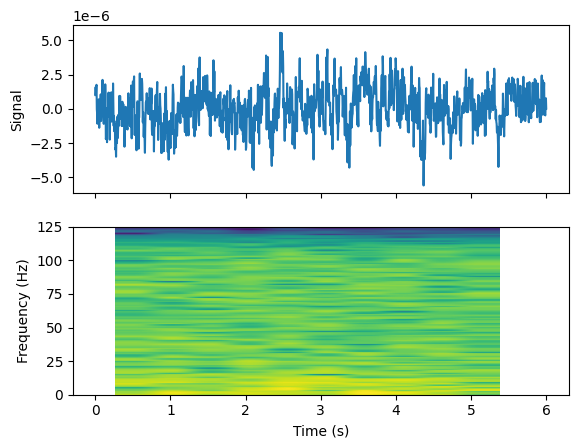

In [19]:
data, times = preprocessed_eeg_dict[3]['raw'].copy().crop(20*60,20.1*60)[:]
x=data[7]

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(times, x)
ax1.set_ylabel('Signal')

Fs = 250

Pxx, freqs, bins, im = ax2.specgram(x, Fs=Fs)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
# ax2.set_xlim(0, 30)
print(Pxx.shape)
plt.show()

In [79]:
from tqdm import tqdm

# Create an empty DataFrame with the required columns
df = pd.DataFrame(columns=['Group', 'Recording', 'Snippet'])

n_recordings = len(preprocessed_eeg_dict)

# Initialize an empty list to store dictionaries for each row
dict_list = []

mne.set_log_level('WARNING')

df_file_name = 'df_feature_2_channels_5min.pkl'
df_file_path = INTERIM_DATA_DIR / df_file_name

if Path.exists(df_file_path):
    print('Loading df')
    df = pd.read_pickle(df_file_path)
else:

    for iRecord in tqdm(range(n_recordings), desc=" Recording", position=tqdm._get_free_pos()):
        
        recording = preprocessed_eeg_dict[iRecord]
        raw = recording['raw'].copy()
        
        Fs = raw.info['sfreq']
        
        # Crop windows of data somewhere in the middle of the recording to avoid recording start and end noise
        recording_start = 10*60 # start 5 min in the recording
        recording_end = 15*60 # end 20 min in the recording
        stepsize = 4 
        win_len = 10
        n_windows = int(np.floor((((recording_end-recording_start)-win_len)/stepsize)))
        n_channels = 2#len(mne.pick_types(raw.info, eeg=True, exclude='bads'))
        raw.crop(recording_start, recording_end)
        
        for iWindow in range(n_windows):
            
            # print(f"iRecord: {iRecord}, iWindow: {iWindow}")
            # Loop over recording and cut segements out of it with overlap
            window_start = iWindow*stepsize
            window_end = window_start+win_len
            window_copy = raw.copy().crop(window_start, window_end)
            
            # Copy data channels and time vector
            picks = mne.pick_types(window_copy.info, eeg=True, exclude='bads')  
            data, times = window_copy[picks, :]
            
            # Loop over channels to calc spectogram for each
            
            spectogram_list = [] # store spectograms in here
            for iChannel in range(data.shape[0]):
                x = data[iChannel]
                # Create spectogram
                spectogram, freqs, t, im = plt.specgram(x, Fs=Fs)
                # Store in list
                spectogram_list.append(spectogram)
            
            # Store spectogoram + metadata as dataframe row   
            # Step 1: Flatten each spectrogram
            flattened_spectrograms = [spectrogram.flatten() for spectrogram in spectogram_list]

            # Step 2: Concatenate all flattened arrays into a single 1D array
            concatenated_spectrogram = np.concatenate(flattened_spectrograms)
            
            # # Step 3: Create a new row with group, recording, and the flattened array
            # new_row = pd.DataFrame([[str(recording['Group']), str(recording['recording']), str(iWindow)] + concatenated_spectrogram.tolist()], 
            #                     columns=['Group', 'Recording', 'Snippet'] + [f"Feature_{i}" for i in range(concatenated_spectrogram.size)])
            
            # Step 3: Create dictionary and add metadata
            row_dict = {
                        'Group': str(recording['Group']),
                        'Recording': str(recording['Recording']),
                        'Window': str(iWindow)
                        }
        
            # Step 4: Add the flattened array values to the dictionary
            for idx, val in enumerate(concatenated_spectrogram):
                row_dict[f"Val_{idx}"] = val

            
            # Step 5: Append the new row to the DataFrame
            # # TODO: not the most efficient way of doing this as concatting df is slow => ideally do this with dictionaries
            # df = pd.concat([df, new_row], ignore_index=True)
            # Append the dictionary to the list
            dict_list.append(row_dict)

    # Convert the list of dictionaries into a DataFrame
    print('Converting to df')
    df = pd.DataFrame(dict_list)
    print('Saving to df')
    df.to_pickle(df_file_path)

print('Done')
# mne.set_log_level('INFO')

print(df.shape)
df.head()

Loading df
Done
(720, 48765)


Group Recording Window         Val_0         Val_1         Val_2  \
0     1         1      0  6.705286e-13  2.629801e-13  3.592089e-12   
1     1         1      1  1.105635e-12  6.534998e-12  2.610714e-13   
2     1         1      2  2.242432e-14  2.764736e-12  2.164589e-12   
3     1         1      3  8.015239e-12  7.907392e-13  2.786395e-14   
4     1         1      4  9.345296e-13  3.308110e-12  3.270447e-11   

          Val_3         Val_4         Val_5         Val_6  ...     Val_48752  \
0  2.897686e-13  8.362928e-14  1.613073e-13  3.053489e-13  ...  2.784739e-21   
1  2.071504e-13  9.621994e-13  3.363938e-12  4.391009e-12  ...  6.036859e-22   
2  2.786245e-13  3.453750e-13  4.045250e-15  2.816531e-13  ...  4.735808e-20   
3  2.015838e-12  1.237019e-12  5.126864e-13  1.426938e-12  ...  6.160323e-21   
4  2.519101e-11  2.122191e-12  2.431936e-11  1.289803e-11  ...  8.378648e-21   

      Val_48753     Val_48754     Val_48755     Val_48756     Val_48757  \
0  1.087549e-21  4.731841e-25  2.048325e-22  5.774978e-22  5.129931e-24   
1  4.179792e-22  4.070497e-23  2.331887e-21  1.513312e-21  5.452774e-22   
2  7.487313e-22  1.297751e-21  6.953015e-22  2.479837e-21  1.669667e-21   
3  1.978092e-21  8.157895e-21  1.573940e-21  4.791618e-22  6.226141e-21   
4  1.703135e-20  3.548807e-21  7.203339e-21  6.443206e-21  1.654557e-21   

      Val_48758     Val_48759     Val_48760     Val_48761  
0  2.712790e-21  6.304584e-21  1.035839e-21  2.431863e-21  
1  5.145046e-21  6.306583e-21  6.858387e-20  3.486910e-22  
2  7.152898e-21  1.614656e-21  5.684205e-21  6.004838e-21  
3  1.388633e-21  8.182924e-22  4.255183e-21  1.489993e-20  
4  1.405908e-20  5.358233e-21  2.133591e-21  9.612384e-21  

[5 rows x 48765 columns]

In [60]:
df_groupby = df.drop('Window',axis=1).groupby(by=['Group', 'Recording']).median()
df_groupby = df_groupby.reset_index()

df_groupby.head()

Group Recording         Val_0         Val_1         Val_2         Val_3  \
0     1         1  3.154213e-12  2.341849e-12  2.352187e-12  1.589399e-12   
1     1         2  2.748535e-11  1.253716e-11  1.556703e-11  2.797993e-11   
2     1         3  4.769936e-11  4.770444e-11  3.641202e-11  2.735433e-11   
3     1         4  4.080941e-12  7.096939e-12  3.715147e-12  5.526378e-12   
4     1         5  1.611554e-12  4.978348e-12  6.081372e-12  3.674475e-12   

          Val_4         Val_5         Val_6         Val_7  ...     Val_48752  \
0  1.783540e-12  2.004461e-12  3.791674e-12  2.743215e-12  ...  2.392563e-21   
1  1.315928e-11  1.847886e-11  2.606749e-11  1.892684e-11  ...  1.966224e-21   
2  3.333294e-11  6.296992e-11  4.610586e-11  5.328480e-11  ...  3.174190e-19   
3  8.353120e-12  3.969692e-12  5.538050e-12  7.343381e-12  ...  1.419417e-21   
4  3.852145e-12  3.900577e-12  5.331049e-12  5.737360e-12  ...  2.074141e-21   

      Val_48753     Val_48754     Val_48755     Val_48756     Val_48757  \
0  1.632966e-21  1.750039e-21  1.356495e-21  1.412477e-21  8.421685e-22   
1  1.305411e-21  1.931417e-21  1.539850e-21  1.442812e-21  2.435103e-21   
2  4.054932e-19  3.222076e-19  2.670904e-19  3.743417e-19  2.871877e-19   
3  1.520166e-21  8.099715e-22  1.279855e-21  1.278065e-21  1.636895e-21   
4  3.083679e-21  3.474834e-21  2.402653e-21  2.374725e-21  3.506817e-21   

      Val_48758     Val_48759     Val_48760     Val_48761  
0  2.013245e-21  1.544303e-21  2.760541e-21  1.327713e-21  
1  1.251669e-21  1.980953e-21  1.242993e-21  1.768477e-21  
2  2.996019e-19  2.278811e-19  3.275499e-19  2.086197e-19  
3  1.534175e-21  1.279995e-21  9.623905e-22  1.992500e-21  
4  2.479405e-21  3.898276e-21  1.389473e-21  3.055676e-21  

[5 rows x 48764 columns]

# XGBoost

In [82]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

data = df.copy().drop(['Group','Recording','Window'],axis=1)
label = df[['Group']].astype(float)

# Extract feature and target arrays
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=False)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=False)

In [86]:
# Define hyperparameters
params = {"objective": "reg:squarederror"}

n = 2
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [89]:
from sklearn.metrics import root_mean_squared_error

y_preds = model.predict(dtest_reg)
rmse = root_mean_squared_error(y_test, y_preds)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.321


In [101]:
params = {"objective": "reg:squarederror"}
n = 100

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10,
   # Activate early stopping
   early_stopping_rounds=10,
)

y_preds = model.predict(dtest_reg)
rmse = root_mean_squared_error(y_test, y_preds)
print(f"RMSE of the base model: {rmse:.3f}")

[0]	train-rmse:0.35178	validation-rmse:0.39266
[10]	train-rmse:0.01227	validation-rmse:0.20104
[20]	train-rmse:0.00153	validation-rmse:0.19891
[30]	train-rmse:0.00042	validation-rmse:0.19866
[40]	train-rmse:0.00023	validation-rmse:0.19865
RMSE of the base model: 0.199


In [127]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    if print_res == 1:
        
        print('Precision =     {:.3f}'.format(precision))
        print('Recall =  {:.3f}'.format(recall))
        print('F1 = {:.3e}'.format(f1))
        
         
    return precision, recall, f1



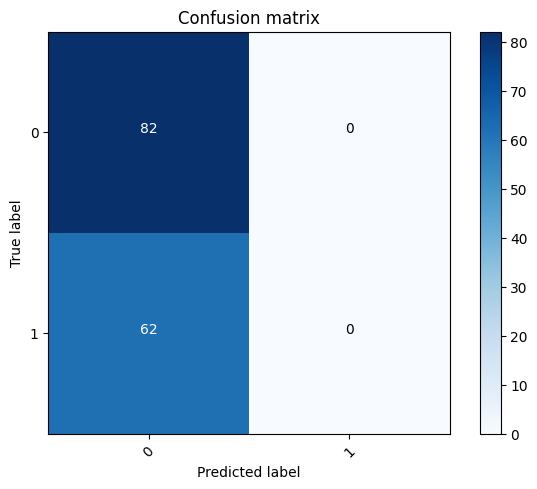

Precision =     nan
Recall =  0.000
F1 = nan


C:\Users\buil003\AppData\Local\Temp\ipykernel_21100\510456047.py:38: RuntimeWarning:

invalid value encountered in scalar divide



In [128]:
thresh = 0.5
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
precision, recall, f1 = show_data(cm, print_res = 1)

In [103]:
def plot_roc(X_, y_, par, name_par, list_par):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,7));
    for l in list_par:
        par[name_par] = l
        print(par)
        mean_fpr, mean_tpr, mean_prec, mean_rec = gen_curves(X_, y_, par)
        ax1.plot(mean_fpr, mean_tpr, label = name_par+" = "+str(l))
        ax2.plot(mean_rec, mean_prec, label = name_par+" = "+str(l))
    ax1.set_xlim([0, 0.0005])
    ax1.set_ylim([0.5, 0.95])
    ax1.axvline(2e-4, color='b', linestyle='dashed', linewidth=2)
    ax1.legend(loc="lower right")
    ax1.set_xlabel('FPR/Fallout')
    ax1.set_ylabel('TPR/Recall')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax1.set_title('ROC')
    ax2.set_title('PR')
    ax2.legend(loc = "lower left")
    ax2.set_xlim([0.5, 1])
    plt.show()

<Axes: title={'center': 'Feature Importance'}>

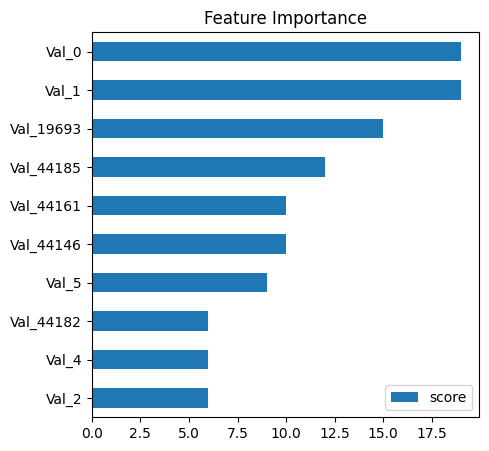

In [114]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

df_feature_importance = pd.DataFrame(data=values, index=keys, columns=["score"])
df_feature_importance.nlargest(10, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (5,5), title='Feature Importance') ## plot top 40 features

# tSNE

In [61]:
labels = ['Group', 'Recording']

df_tsne, tsne_embedding = get_tsne_df(
    df=df_groupby,
    labels=labels,
    perplexity=2,
)

plot_dim_reduction(df=df_tsne,
    labels=labels,
    hue_col='Group',
    title= "tSNE plot",
)

In [62]:
labels = ['Group', 'Recording', 'Window']

df_tsne, tsne_embedding = get_tsne_df(
    df=df,
    labels=labels,
    perplexity=30,
)

plot_dim_reduction(df=df_tsne,
    labels=labels,
    hue_col='Group',
    title= "tSNE plot",
)

KeyboardInterrupt: 

In [ ]:
df_temp = df_tsne.copy()
df_temp['Label']=df_temp['Group'].astype('str')+'-'+df_temp['Recording'].astype('str')

plot_dim_reduction(df=df_temp,
    labels=labels,
    hue_col='Label',
    title= "tSNE plot",
    plot_ellips=False
)

In [64]:
labels = ['Group', 'Recording', 'Window']

df_pca, pca_embedding = get_pca_df(
    df=df,
    labels=labels,
)

plot_dim_reduction(df=df_pca,
    labels=labels,
    hue_col='Group',
    title= "PCA plot",
)

# ICA

Reading 0 ... 319749  =      0.000 ...  1278.996 secs...
Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\buil003\AppData\Local\Temp\ipykernel_19244\3030522306.py:5: RuntimeWarning:

The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.



Selecting by number: 15 components
Fitting ICA took 2.9s.
{'eeg': np.float64(0.985744332401105)}


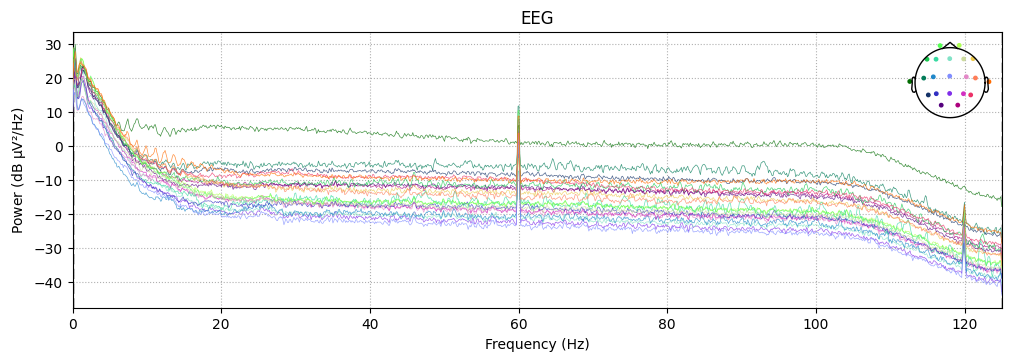

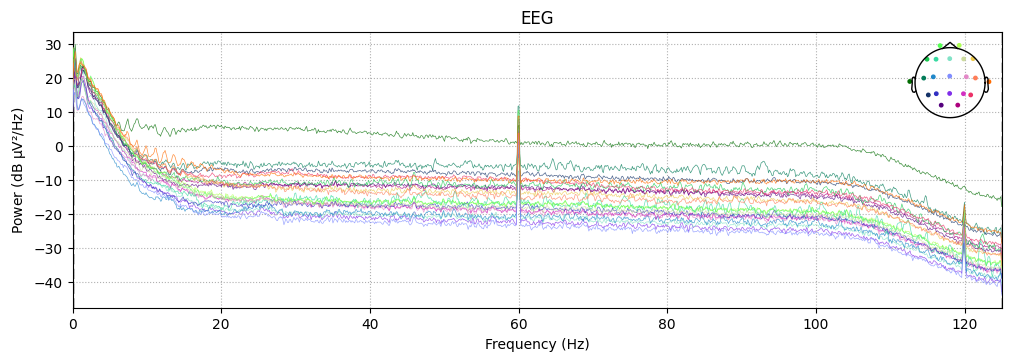

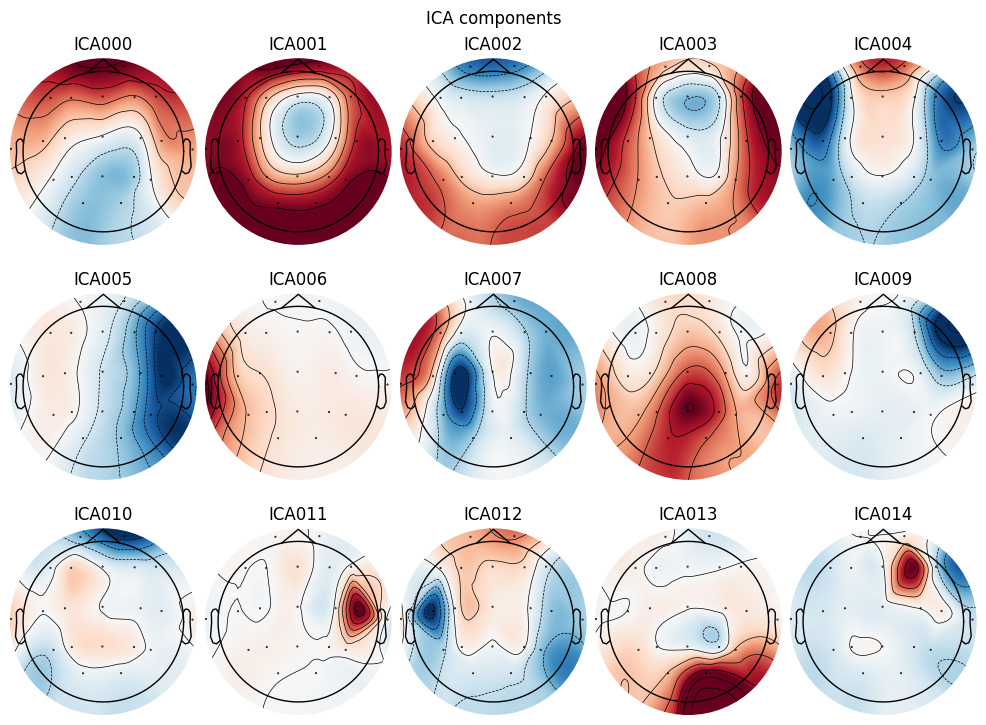

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components


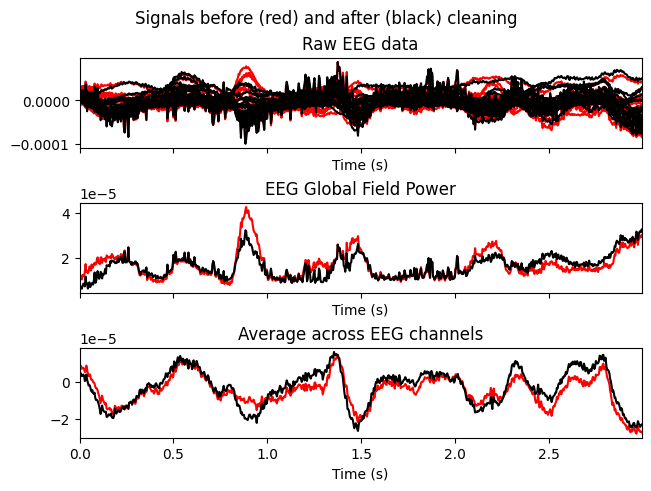

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
639 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
639 matching events found
No baseline correction applied
0 projection items activated


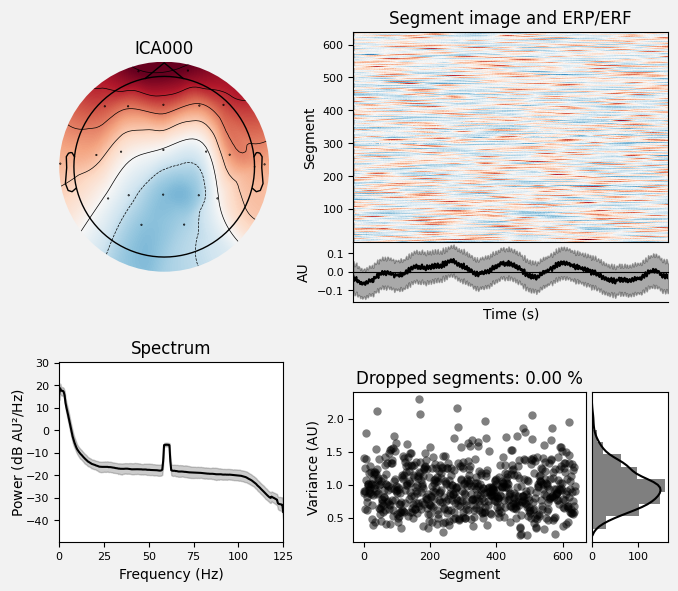

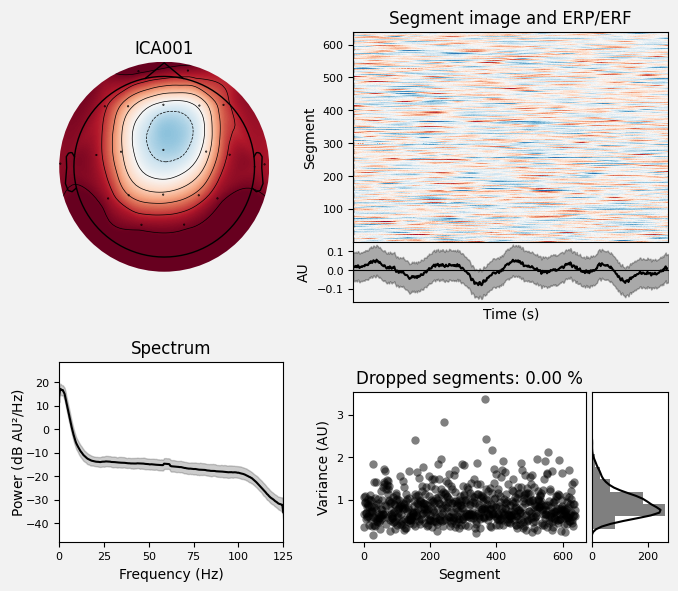

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
# ICA for components
ica = mne.preprocessing.ICA(n_components=15, max_iter="auto", random_state=97)
ica.fit(raw.load_data())
ica

# see explained variance
explained_var_ratio = ica.get_explained_variance_ratio(raw)
print(explained_var_ratio)

# visualize the components
# overview
ica.plot_components()

# blinks
ica.plot_overlay(raw, exclude=[0], picks="eeg")

# check properties
ica.plot_properties(raw, picks=[0,1])